In [6]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import datetime
import time

%matplotlib inline

In [2]:
# Load dataset
data_train = pd.read_csv('datasets/CleanDataTrain.csv')

In [3]:
# Segregate features and labels into separate variables
X,y = data_train.iloc[:,0:103] , data_train.iloc[:,103]

In [4]:
scaler = StandardScaler()
rescaledX = scaler.fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [7]:
result = []
tol = [0.1, 0.01, 0.001, 0.0001]
for i in tol:
    print(i)
    model = LogisticRegression(C=i, random_state=42)
    start_time = datetime.datetime.now()
    model_score = cross_val_score(model, rescaledX, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    print('Time elapsed:', datetime.datetime.now() - start_time)
    print(model_score)
    result.append(np.mean(model_score))

0.1
Time elapsed: 0:00:08.274389
[0.71488151 0.71626834 0.71617246 0.71738508 0.7183599 ]
0.01
Time elapsed: 0:00:06.058075
[0.71489759 0.71627903 0.71624905 0.71736076 0.71840857]
0.001
Time elapsed: 0:00:04.846399
[0.7146791  0.71587433 0.71631789 0.71700923 0.71838037]
0.0001
Time elapsed: 0:00:02.796038
[0.70966753 0.71051714 0.71180715 0.71178691 0.71340715]


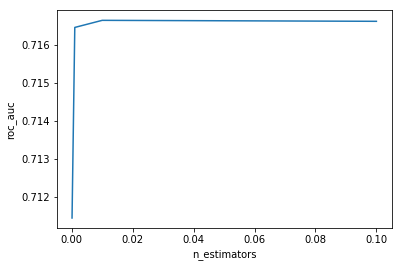

In [9]:
plt.plot(tol, result)
plt.xlabel('n_estimators')
plt.ylabel('roc_auc')
plt.show()

In [23]:
max_score = " ".join([repr(tol[result.index(max(result))]), repr(round(max(result), 2))])
print(max_score)

0.01 0.72


1. Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?
0,72 такое же как и у градиентного бустинга но времени на расчет потребовалось 6 секунд, т.к здесь не требовалось построение сотен деревьев.